In [20]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
images_path = "../images"
images = os.listdir(images_path)

In [22]:
def get_alpha_matrix(image_path):
    img = Image.open(image_path)
    
    img = img.convert("RGBA")
    
    pixels = np.array(img)
    
    alpha_channel = pixels[:, :, 3]
    
    return alpha_channel

In [23]:
def get_binary_alpha_matrix(image_path):
    alpha_matrix = get_alpha_matrix(image_path)
    alpha_matrix[alpha_matrix != 0] = 255
    return alpha_matrix

In [84]:
def draw_transparency_plots(image):
    alpha_matrix = get_alpha_matrix(f"{images_path}/{image}")
    alpha_binrary_matrix = get_binary_alpha_matrix(f"{images_path}/{image}")
    flattened_alpha_matrix = alpha_matrix.flatten()


    fig, axs = plt.subplots(nrows=1, ncols=2)
    im1 = axs[0].imshow(alpha_matrix)    
    im2 = axs[1].imshow(alpha_binrary_matrix)


    axs[0].set_title("alpha")
    axs[1].set_title("alpha-binary")
    fig.colorbar(im1, ax=axs[1], orientation="vertical")

    plt.show()

In [87]:
def draw_transparency_histogram(image):
    alpha_matrix = get_alpha_matrix(f"{images_path}/{image}")


    fig, ax = plt.subplots()
    ax.hist(alpha_matrix, bins=10)

    ax.set_title("alpha histogram")

    plt.show()

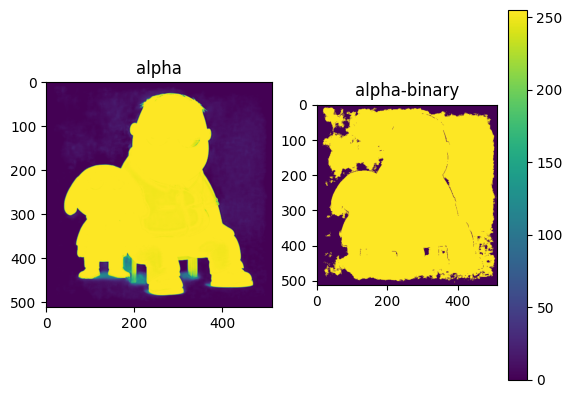

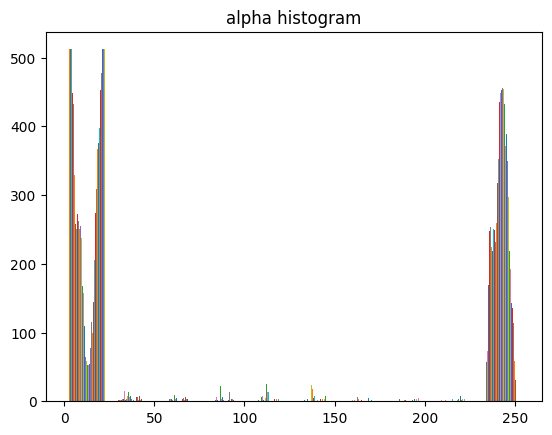

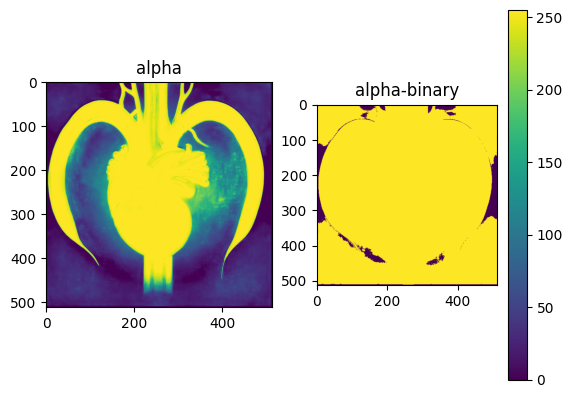

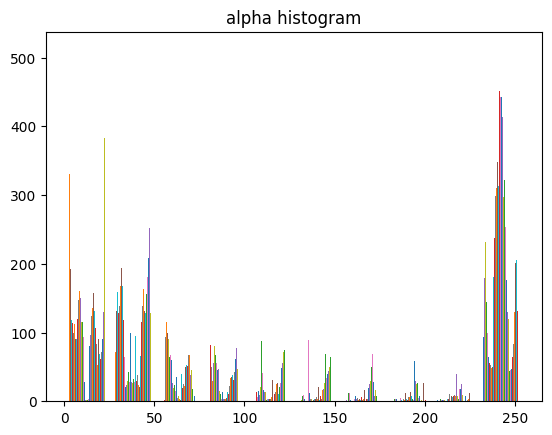

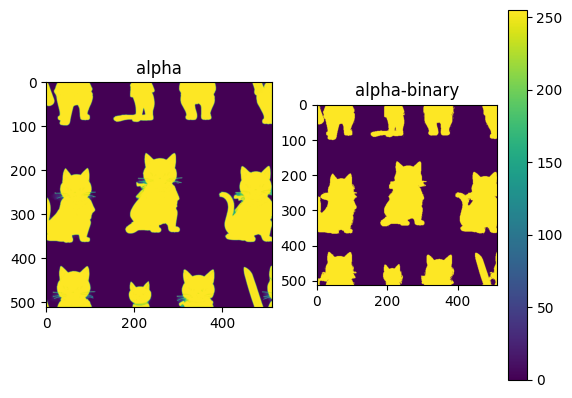

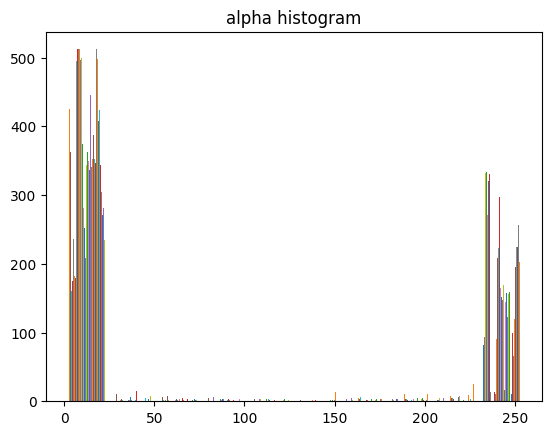

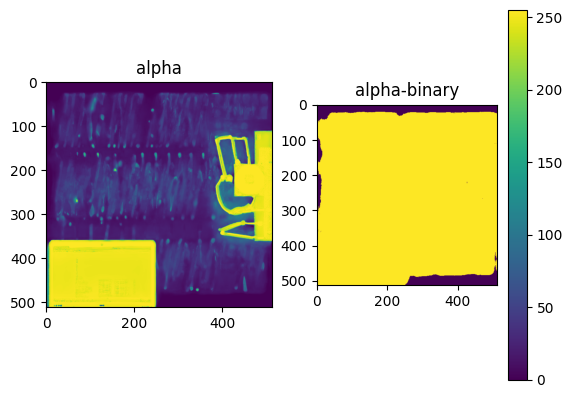

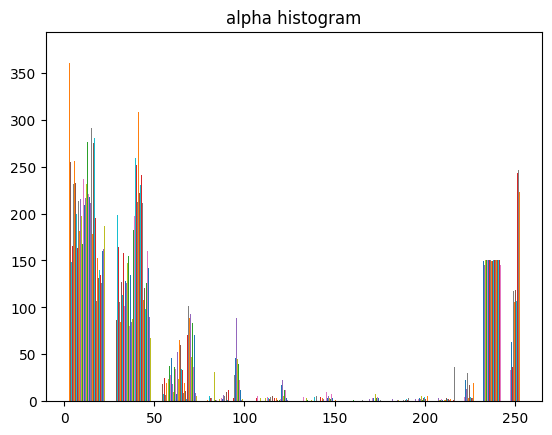

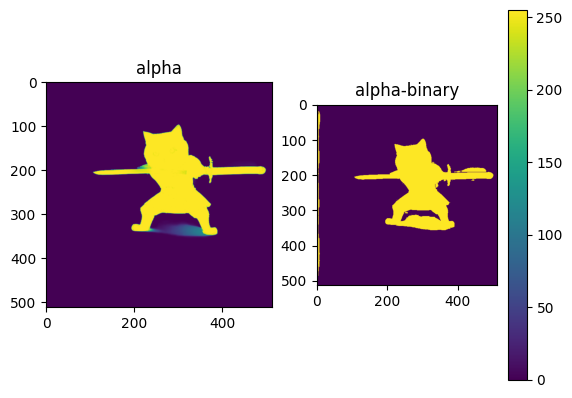

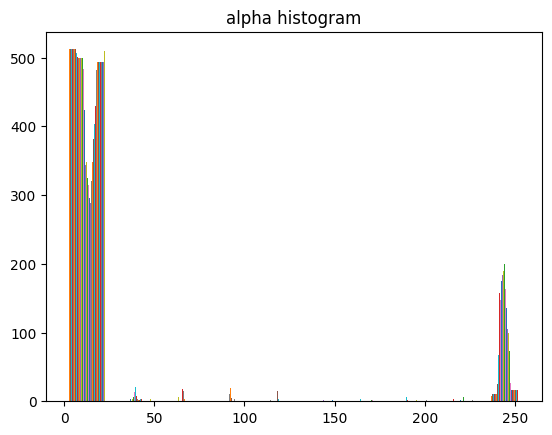

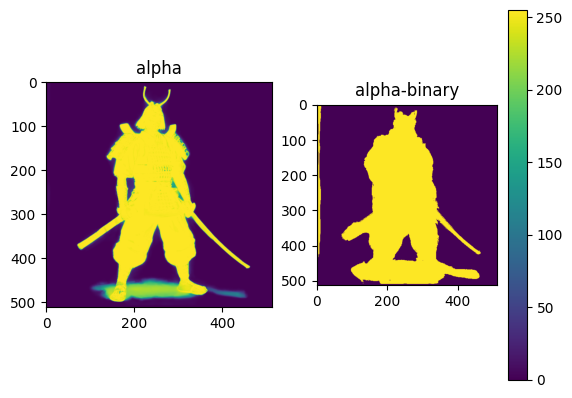

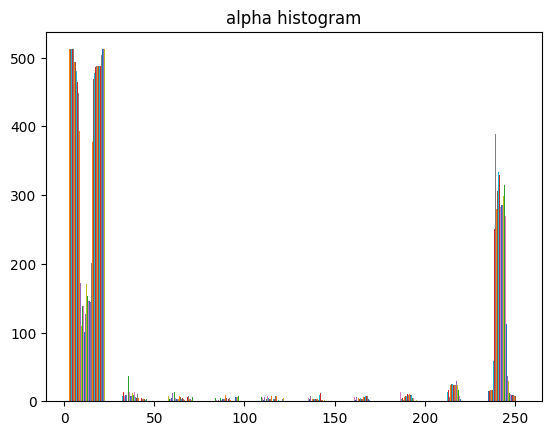

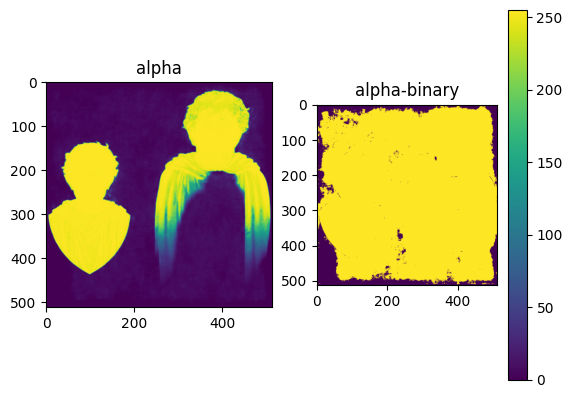

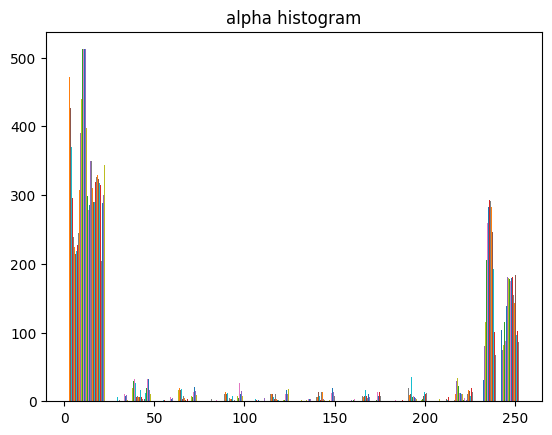

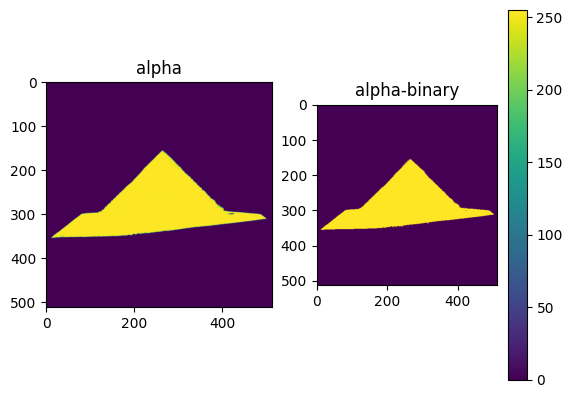

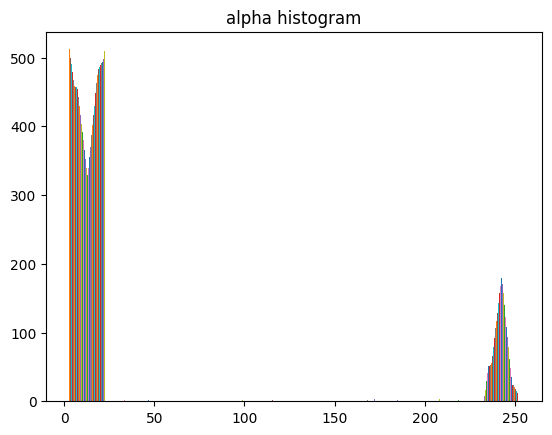

In [88]:
for image in images:
    draw_transparency_plots(image)
    draw_transparency_histogram(image)